In [1]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
#from traitlets.config.manager import BaseJSONConfigManager
#from pathlib import Path

#path = Path.home() / ".jupyter" / "nbconfig"
#cm = BaseJSONConfigManager(config_dir=str(path))
#cm.update(
#    "rise",
#    {
#        "theme": "simple",
#        "transition": "zoom",
#        "start_slideshow_at": "selected",
#        "scroll": "true",   
#     }
#)


# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [3]:
%%javascript
$("li").addClass("fragment");

Reveal.addEventListener("slidechanged", function(event){ 
    $("li").addClass("fragment");
    
});
        

<IPython.core.display.Javascript object>


<img align="left" src="https://ri.powerinit.com/Data/UI/RiseLogo_100x120@2x.png" width="10%"/>

 <img align="right" src="img/scikit-learn-logo.png" width="50%" />

<br /><br /><br /><br /><br /><br /><br/>
<h1>An introduction to Machine Learning with Scikit-Learn, Numpy and Pandas*</h1>
    <br /><br />
    Tomas Olsson
    <br/>
    January 2019
        <br /><br /><br /><br />
    <b>Research Institutes of Sweden</b>
    <br/>
    <b>ICT</b>
    <br/>
    <b>RISE SICS Västerås (RISE AI)</b>
    <br/>
    <a href="mailto:tomas.olsson@ri.se">tomas.olsson@ri.se</a>
    <br /><br />
    <tiny>*Based on a presentation by Gilles Louppe (<a href="https://twitter.com/glouppe">@glouppe</a>), University of Liège</tiny>
    <br /><br />


## Prerequisites 


In [4]:
# This is an Jupyter notebook, with executable Python code inside
42 / 2

21.0

- Materials available on  <a href="https://github.com/RISE-SICS-V">GitHub</a> https://github.com/RISE-SICS-V/tutorials-scikit-learn

- Require a Python distribution with scientific packages (NumPy, SciPy, Scikit-Learn, Pandas)

- See installation instructions in README

# Tomas Olsson

* Senior Machine learning researcher at RISE SICS Västerås
* PhD in Computer Science at MdH
* Fault diagnostics and anomaly detection
* Industrial project partners:
    - ABB, Volvo CE, Scania, Atlas Copco, Mälarenergi, BillerudKorsnäs, Tupras, etc.

<img align="right" width="20%" src="https://avatars3.githubusercontent.com/u/17475878?s=400&u=ff2d8efa1a2996d54d9096d5d32567119e1ac440&v=4"/>

# RISE 

- RISE Research Institutes of Sweden

- ~2600 co-workers
- 6 divisions: 
    - Bioeconomy, Bioscience and Materials, ICT, Built Environment, 
    Safety and Transport, Materials and Production
- five business and innovation areas: 
    - Digitalisation, Energy and Bio-based Economy, Health and Life Science, 
    Sustainable Cities, and Communities and Mobility.
    
### RISE SICS VÄSTERÅS
- ICT
- ~45 researchers
- Digitalisation
- AI/Machine learning
- UX design (VR, AR)
- Optimisation
- Innovation mangement


# Outline
- Scikit-Learn and the scientific ecosystem in Python
    - Examples for classification but works similar for regerssion
- NumPy - the data container
- Pandas - the data mangler library
- Beyond Scikit-Learn
- Summary


# Scikit-Learn

## Overview

- Machine learning library written in __Python__
- __Simple and efficient__, for both experts and non-experts
- Classical, __well-established machine learning algorithms__
- Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
- __BSD 3 license__

## Community driven development

- 20~ core developers (mostly researchers)
- 500-1000 occasional contributors
- __All working publicly together__ on [GitHub](https://github.com/scikit-learn/scikit-learn)
- Emphasis on __keeping the project maintainable__
    - Style consistency
    - Unit-test coverage
    - Documentation and examples
    - Code review
- Mature and stable
- Join us!

## Python stack for data analysis

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._
<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>
- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## Data 

- Input data = Numpy arrays or Scipy sparse matrices ;

- Algorithms are expressed using high-level operations defined on matrices or vectors (similar to MATLAB) ;
    - Leverage efficient low-leverage implementations ;
    - Keep code short and readable. 

## NumPy*

- the core library for scientific computing in Python
- high-performance multidimensional array objects
- tools for working with these arrays
- linear algebra: solvers, eigenvalues, etc.
- Intro for matlab users: https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

*Based on http://cs231n.github.io/python-numpy-tutorial/  

In [5]:
import numpy as np
           
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a 

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [6]:
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

In [7]:
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


In [8]:
# Generate data

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

[[-6.453 -8.764]
 [ 0.29   0.147]
 [-5.184 -1.253]
 ...
 [-0.231 -1.608]
 [-0.603  6.873]
 [ 2.284  4.874]]
['r' 'r' 'b' 'r' 'b']


In [9]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)  


(1000, 2)
(1000,)


In [10]:
# Rows and columns can be accessed with lists, slices or masks
print(X[[1, 2, 3]])     # rows 1, 2 and 3
print()
print(X[:5])            # 5 first rows
print()
print(X[500:510, 0])    # values from row 500 to row 510 at column 0
print()
print(X[y == "b"][:5])  # 5 first rows for which y is "b"

[[ 0.29   0.147]
 [-5.184 -1.253]
 [-4.714  3.674]]

[[-6.453 -8.764]
 [ 0.29   0.147]
 [-5.184 -1.253]
 [-4.714  3.674]
 [ 4.516 -2.881]]

[-4.438 -2.46   4.331 -7.921  1.57   0.565  4.996  4.758 -1.604  1.101]

[[-5.184 -1.253]
 [ 4.516 -2.881]
 [ 1.708  2.624]
 [-0.526  8.96 ]
 [-1.076  9.787]]


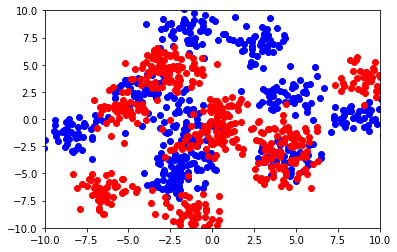

In [11]:
   # Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()   

## Loading external data

- Numpy provides some [simple tools](https://docs.scipy.org/doc/numpy/reference/routines.io.html) for loading data from files (CSV, binary, etc);

- For structured data, Pandas provides more [advanced tools](http://pandas.pydata.org/pandas-docs/stable/io.html) (CSV, JSON, Excel, HDF5, SQL, etc); 
    -  More on Pandas later...

## Algorithms provided by Scikit-learn

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors 
* Neural networks (basics)
* Gaussian Processes
* Feature selection

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics


_... and many more!_ (See our [Reference](http://scikit-learn.org/dev/modules/classes.html))

# Classification

## Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.

The goal of supervised classification is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

## Applications

- Classifying bad and good signals; 
- Diagnosing disease from symptoms;
- Recognising cats in pictures;
- Identifying body parts with Kinect cameras;
- ...
  

## A simple and unified API

All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- a `transformer` interface for converting data.


Goal: enforce a simple and consistent API to __make it trivial to swap or plug algorithms__. 

### Estimators

In [ ]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self

In [12]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try 
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# Estimator state is stored in instance attributes
clf._tree

### Predictors

In [14]:
# Make predictions  
print(clf.predict(X[:5])) 

['r' 'r' 'r' 'b' 'b']


In [15]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]]


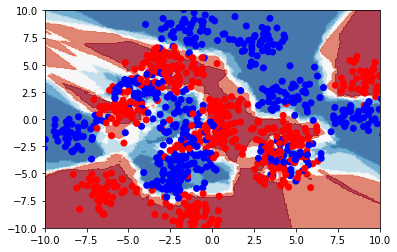

In [16]:
from tutorial import plot_surface    
plot_surface(clf, X, y)

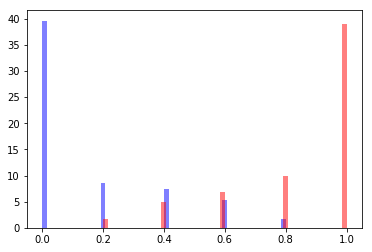

In [17]:
from tutorial import plot_histogram    
plot_histogram(clf, X, y)

## Classifier zoo

### Decision trees

Idea: greedily build a partition of the input space using cuts orthogonal to feature axes.

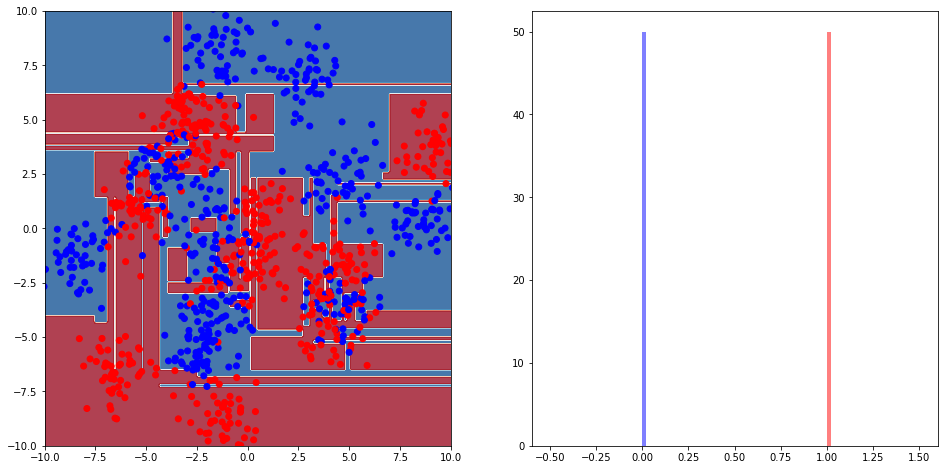

In [18]:
from tutorial import plot_clf
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

### Random Forests

Idea: Build several decision trees with controlled randomness and average their decisions.

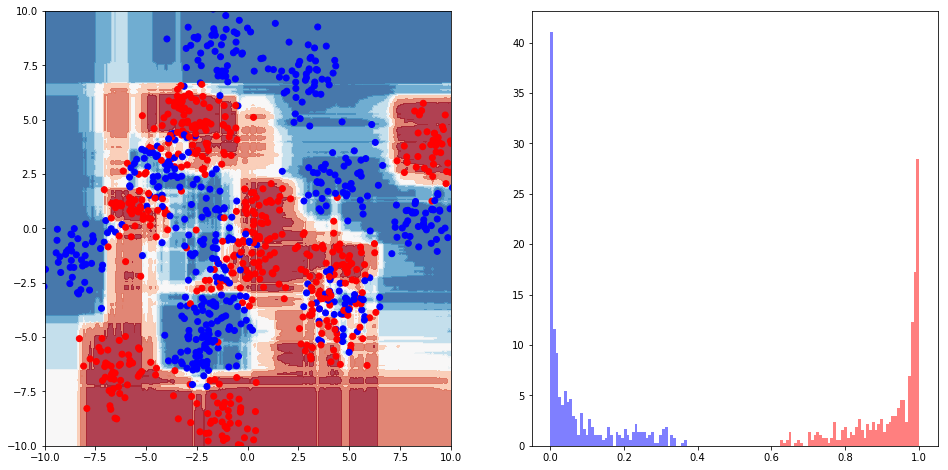

In [19]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier 
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

### Logistic regression

Idea: model the decision boundary as an hyperplane.

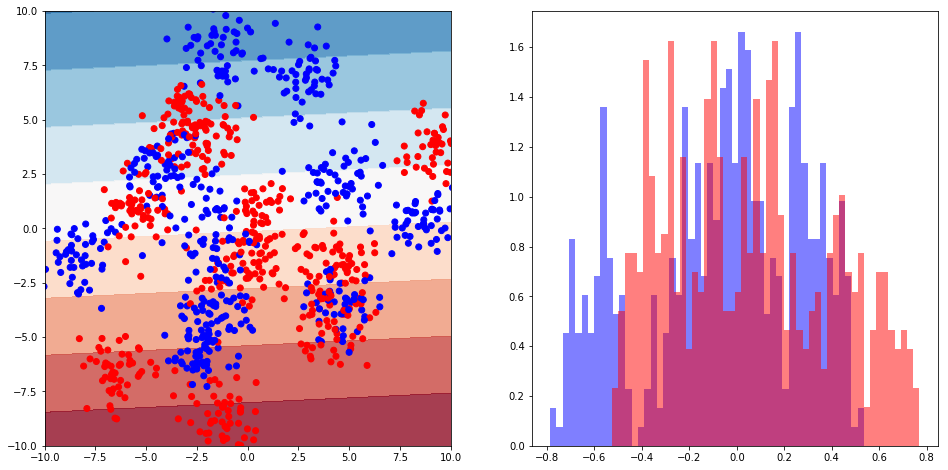

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
plot_clf(clf, X, y)

### Support vector machines

Idea: Find the hyperplane which has the largest distance to the nearest training points of any class.

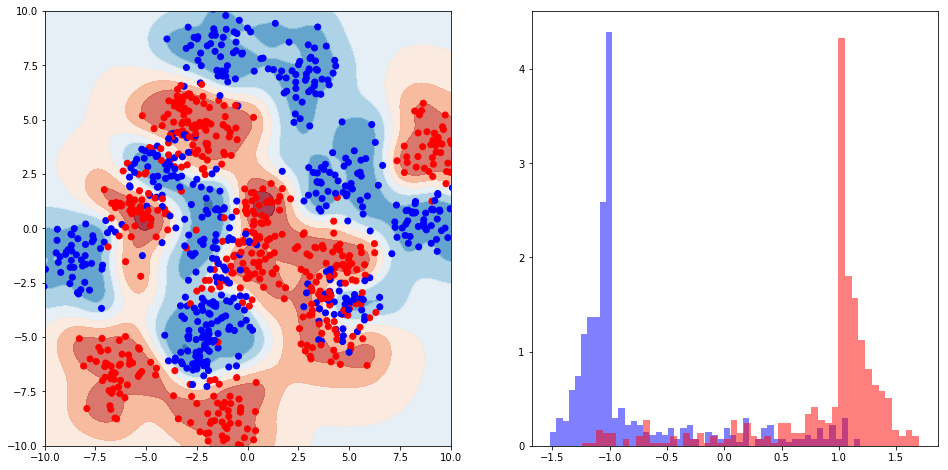

In [22]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")  # try kernel="rbf" instead
clf.fit(X, y)
plot_clf(clf, X, y)

### Multi-layer perceptron

Idea: a multi-layer perceptron is a circuit of non-linear combinations of the data.

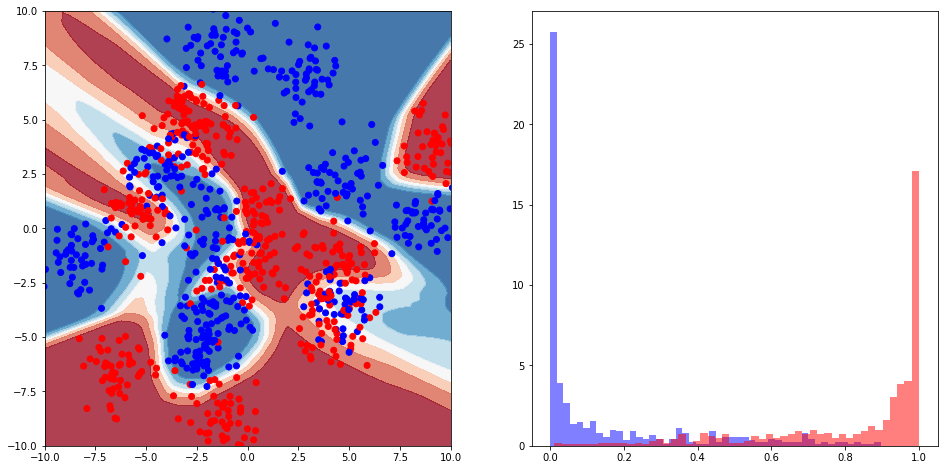

In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="relu", learning_rate="invscaling")
clf.fit(X, y)
plot_clf(clf, X, y) 

### Gaussian Processes

Idea: a gaussian process is a distribution over functions $f$, such that $f(\mathbf{x})$, for any set $\mathbf{x}$ of points, is gaussian distributed.

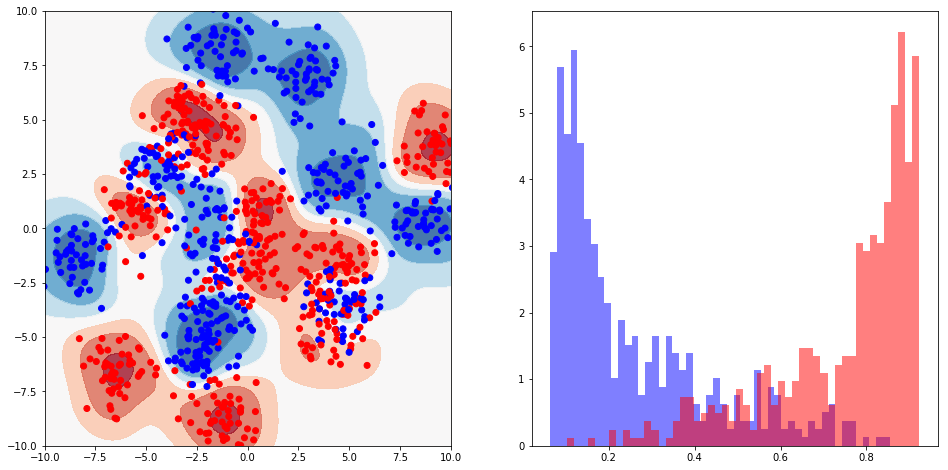

In [24]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)         

# Model evaluation and selection

## Evaluation

- Recall that we want to learn an estimator $\varphi$ minimizing the generalization error $Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}$.

- Problem: Since $P_{X,Y}$ is unknown, the generalization error $Err(\varphi)$ cannot be evaluated.

- Solution: Use a proxy to approximate $Err(\varphi)$.

## Training error

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)   
print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.0


## Test error

* Issue: the training error is a __biased__ estimate of the generalization error.

* Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test))) 

Training error = 0.10266666666666668
Test error = 0.15600000000000003


Summary: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- __The same data should not be used both for training and evaluation.__

## Cross-validation

Issue: 
- When ${\cal L}$ is small, training on 70% of the data may lead to a model that is significantly different from a model that would have been learned on the entire set ${\cal L}$. 
- Yet, increasing the size of the training set (resp. decreasing the size of the test set), might lead to an inaccurate estimate of the generalization error. 

Solution: K-Fold cross-validation. 
- Split ${\cal L}$ into K small disjoint folds. 
- Train on K-1 folds, evaluate the test error one the held-out fold.
- Repeat for all combinations and average the K estimates of the generalization error.
<center><img src="img/cross-validation.png"/></center>

In [27]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(zero_one_loss(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.163000 +-0.010770


In [28]:
# Shortcut
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

CV error = 0.163000 +-0.010770


## Metrics

### Default score

Estimators come with a built-in default evaluation score
* Accuracy for classification 
* R2 score for regression

In [29]:
y_train = (y_train == "r")
y_test = (y_test == "r")
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

Default score = 0.84


### Accuracy

Definition: The accuracy is the proportion of correct predictions.

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.84


### Precision, recall and F-measure

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

### ROC AUC

Definition: Area under the curve of the false positive rate (FPR) against the true positive rate (TPR) as the decision threshold of the classifier is varied.

In [ ]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer("roc_auc")
print("ROC AUC =", roc_auc_scorer(clf, X_test, y_test))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Confusion matrix

Definition: number of samples of class $i$ predicted as class $j$.

In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)), columns=["Predicted False", "Predicted True"], index=["Real False", "Real True"]) 

,Predicted False,Predicted True
Real False,86,19
Real True,13,82


### Regression errors

Definitions: see <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">sklearn regression metrics</a>


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

y_pred = clf.predict_proba(X_test).T[1]
print("Mean squared error =", mean_squared_error(y_test.astype(float), y_pred))
print("Mean absolute error =", mean_absolute_error(y_test.astype(float), y_pred))
print("Mean squared log error =", mean_squared_log_error(y_test.astype(float), y_pred))
print("r2_score =", r2_score(y_test.astype(float), y_pred))


Mean squared error = 0.10260000000000001
Mean absolute error = 0.177
Mean squared log error = 0.05137972059559238
r2_score = 0.5885714285714284


## Model selection
 
- Finding good hyper-parameters is crucial to control under- and over-fitting, hence achieving better performance.
- The estimated generalization error can be used to select the best model.

## Under- and over-fitting

- Over-fitting: the model is too specific to the training set and does not generalize.
- Under-fitting: the model is too simple and does not capture the true relation between X and Y.


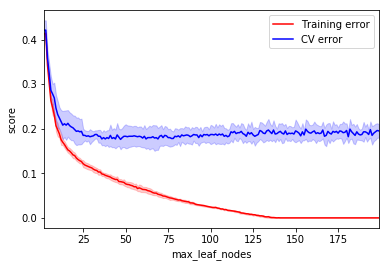

In [37]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(2, 200)
param_name = "max_leaf_nodes"

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")

In [38]:
# Best trade-off
print("%s = %d, CV error = %f" % (param_name,
                                  param_range[np.argmax(test_scores_mean)],
                                   1. - np.max(test_scores_mean)))

max_leaf_nodes = 47, CV error = 0.176000


Question: Where is the model under-fitting and over-fitting?

Question: What does it mean if the training error is different from the test error?

## Hyper-parameter search

In [39]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": list(range(1, 100))},
                    scoring="accuracy",
                    cv=5, n_jobs=-1)
grid.fit(X, y)  # Note that GridSearchCV is itself an estimator

print("Best score = %f, Best parameters = %s" % (1. - grid.best_score_, 
                                                 grid.best_params_))

Best score = 0.131000, Best parameters = {'n_neighbors': 34}


Question: Should you report the best score as an estimate of the generalization error of the model?

## Selection and evaluation, _simultaneously_

- `grid.best_score_` is not independent from the best model, since its construction was guided by the optimization of this quantity. 

- As a result, the optimized `grid.best_score_` estimate _may_ in fact be a biased, optimistic, estimate of the true performance of the model. 

- Solution: Use __nested__ cross-validation for correctly selecting the model __and__ correctly evaluating its performance. 

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(
            GridSearchCV(KNeighborsClassifier(),
                         param_grid={"n_neighbors": list(range(1, 100))},
                         scoring="accuracy",
                         cv=5, n_jobs=-1), 
            X, y, cv=5, scoring="accuracy")

# Unbiased estimate of the accuracy
print("%f +-%f" % (1. - np.mean(scores), np.std(scores)))

0.144000 +-0.023958


# Transformers, pipelines and feature unions

## Transformers

- Classification (or regression) is often only one or the last step of a long and complicated process;
- In most cases, input data needs to be cleaned, massaged or extended before being fed to a learning algorithm;
- For this purpose, Scikit-Learn provides the ``transformer`` API.

In [ ]:
class Transformer(object):    
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self
    
    def transform(self, X):
        """Transform X into Xt."""
        # transform X in some way to produce Xt
        return Xt
    
    # Shortcut
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        Xt = self.transform(X)
        return Xt 

## Transformer zoo

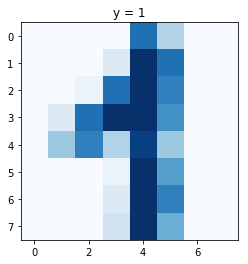

In [41]:
# Load digits data
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Plot
sample_id = 42
plt.imshow(X[sample_id].reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.title("y = %d" % y[sample_id])
plt.show()

### Scalers and other normalizers

In [42]:
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X_train)  
print("Mean (before scaling) =", np.mean(X_train))
print("Mean (after scaling) =", np.mean(Xt_train))

# Shortcut: Xt = tf.fit_transform(X)
# See also Binarizer, MinMaxScaler, Normalizer, ...

Mean (before scaling) = 4.8921213808463255
Mean (after scaling) = -2.307813265739004e-18


In [43]:
# Scaling is critical for some algorithms
from sklearn.svm import SVC
clf = SVC()
print("Without scaling =", clf.fit(X_train, y_train).score(X_test, y_test))
print("With scaling =", clf.fit(tf.transform(X_train), y_train).score(tf.transform(X_test), y_test))

Without scaling = 0.4866666666666667
With scaling = 0.9844444444444445


### Feature selection

Shape = (1347, 10)


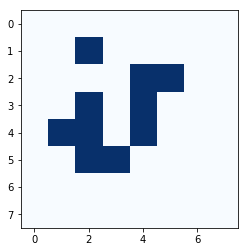

In [44]:
# Select the 10 top features, as ranked using ANOVA F-score
from sklearn.feature_selection import SelectKBest, f_classif
tf = SelectKBest(score_func=f_classif, k=10)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# Plot support
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show() 

### Feature selection (cont.)

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

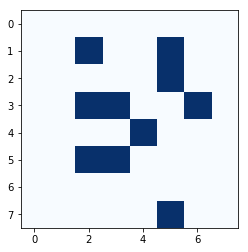

In [45]:
# Feature selection using backward elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
tf = RFE(RandomForestClassifier(), n_features_to_select=10, verbose=1)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# Plot support
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

### Decomposition, factorization or embeddings

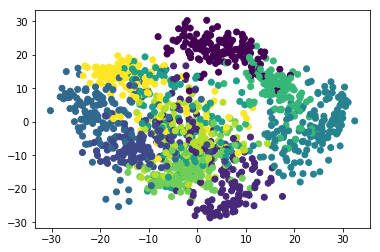

In [46]:
# Compute decomposition
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
tf = PCA(n_components=2)
Xt_train = tf.fit_transform(X_train)

# Plot
plt.scatter(Xt_train[:, 0], Xt_train[:, 1], c=y_train)
plt.show()

# See also: KernelPCA, NMF, FastICA, Kernel approximations, 
#           manifold learning, etc

### Function transformer

In [47]:
from sklearn.preprocessing import FunctionTransformer

def increment(X):
    return X + 1

tf = FunctionTransformer(func=increment)
Xt = tf.fit_transform(X)
print(X[0])
print(Xt[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 1.  1.  6. 14. 10.  2.  1.  1.  1.  1. 14. 16. 11. 16.  6.  1.  1.  4.
 16.  3.  1. 12.  9.  1.  1.  5. 13.  1.  1.  9.  9.  1.  1.  6.  9.  1.
  1. 10.  9.  1.  1.  5. 12.  1.  2. 13.  8.  1.  1.  3. 15.  6. 11. 13.
  1.  1.  1.  1.  7. 14. 11.  1.  1.  1.]


## Pipelines

Transformers can be chained in sequence to form a pipeline.

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Chain transformers to build a new transformer
tf = make_pipeline(StandardScaler(), 
                   SelectKBest(score_func=f_classif, k=10))
tf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x1a1d30b400>))])

In [49]:
Xt_train = tf.transform(X_train)
print("Mean =", np.mean(Xt_train))
print("Shape =", Xt_train.shape)

Mean = -1.3715004550677509e-17
Shape = (1347, 10)


In [50]:
# Chain transformers + a classifier to build a new classifier
clf = make_pipeline(StandardScaler(), 
                    SelectKBest(score_func=f_classif, k=10), 
                    RandomForestClassifier())
clf.fit(X_train, y_train)
print(clf.predict_proba(X_test)[:5])

[[0.  0.  0.9 0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.1 0.8 0. ]
 [0.  0.  0.9 0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]]


In [51]:
# Hyper-parameters can be accessed using step names
print("K =", clf.get_params()["selectkbest__k"])

K = 10


In [52]:
clf.named_steps

{'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'selectkbest': SelectKBest(k=10, score_func=<function f_classif at 0x1a1d30b400>),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

In [53]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, 
                    param_grid={"selectkbest__k": [1, 10, 20, 30, 40, 50],
                                "randomforestclassifier__max_features": [0.1, 0.25, 0.5]})
grid.fit(X_train, y_train)

print("Best params =", grid.best_params_)

Best params = {'randomforestclassifier__max_features': 0.5, 'selectkbest__k': 50}


## Feature unions

Similarly, transformers can be applied in parallel to transform data in union.

## Nested composition

Since pipelines and unions are themselves estimators, they can be composed into nested structures.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_union
from sklearn.decomposition import PCA

clf = make_pipeline(
    # Build features
    make_union(
        FunctionTransformer(func=lambda X: X), # Identity
        PCA(),
    ), 
    # Select the best features
    RFE(RandomForestClassifier(), n_features_to_select=10),
    # Train
    MLPClassifier()
)

clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=None,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x1a24502f28>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
      ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

## Scikit-learn summary

- Algorithms
- Estimators, Predictors and Transformers
- Model selection
- Pipelines and Unions


# Pandas

<img align="right" src="img/pandas-logo.png" width="25%" style="max-width: 50%; display: inline" />

- Pandas is you friend for managing complex data, especially time series data/signals
- Selection by any type not just integers (as numpy)
- Hierachical columns/index names
- Loads many file formats
- Methods for handling missing values
- Manges different timezones
- Good documentation and examples: <a href="https://pandas.pydata.org/">https://pandas.pydata.org/</a>.


In [56]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

iris.tail(5)   

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [57]:
iris[['petal_length','petal_width']].head(5)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [58]:
# Create a hierachical multi index
cols = [tuple(_.split('_')) for _ in iris.columns]
levels=[[_[0]  for _ in cols ], [_[1]for _ in cols if len(_)>1] + ['']]
iris.columns = pd.MultiIndex.from_arrays(levels)
iris.head(5)

sepal        petal       species
  length width length width        
0    5.1   3.5    1.4   0.2  setosa
1    4.9   3.0    1.4   0.2  setosa
2    4.7   3.2    1.3   0.2  setosa
3    4.6   3.1    1.5   0.2  setosa
4    5.0   3.6    1.4   0.2  setosa

In [59]:
iris['petal'].head(5)

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Time series*

<small>Download from <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F05z1_,%2Fm%2F053_x">https://trends.google.com/trends/explore?date=all&q=%2Fm%2F05z1_,%2Fm%2F053_x</a></small>

<small>*Partially based on <a href="https://dzone.com/articles/time-series-data-analysis-tutorial-with-pandas">https://dzone.com/articles/time-series-data-analysis-tutorial-with-pandas</a></small>

In [60]:
ts = pd.read_csv('data/multiTimeline.csv', skiprows=1)
ts.tail(5)

,Month,Python: (Worldwide),MATLAB: (Worldwide)
176,2018-09,93,24
177,2018-10,100,28
178,2018-11,96,27
179,2018-12,85,22
180,2019-01,85,19


In [61]:
ts.Month = pd.to_datetime(ts.Month)
ts.set_index('Month', inplace=True)
original_cols = ts.columns
ts.tail(5)

,Python: (Worldwide),MATLAB: (Worldwide)
Month,,
2018-09-01,93,24
2018-10-01,100,28
2018-11-01,96,27
2018-12-01,85,22
2019-01-01,85,19


In [62]:
# We can also set timezone and infer the day light saving 
ts = ts.tz_localize('Europe/Stockholm', ambiguous='infer')
ts.tail(5)

,Python: (Worldwide),MATLAB: (Worldwide)
Month,,
2018-09-01 00:00:00+02:00,93,24
2018-10-01 00:00:00+02:00,100,28
2018-11-01 00:00:00+01:00,96,27
2018-12-01 00:00:00+01:00,85,22
2019-01-01 00:00:00+01:00,85,19


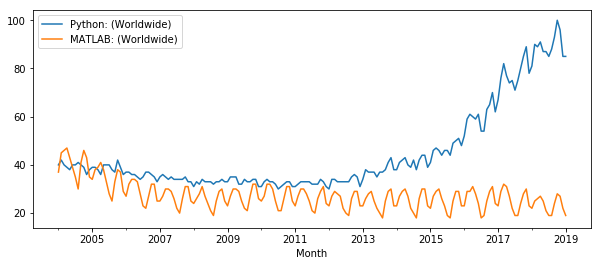

In [63]:
# We can plot the time series
ts.plot(figsize=(10,4));

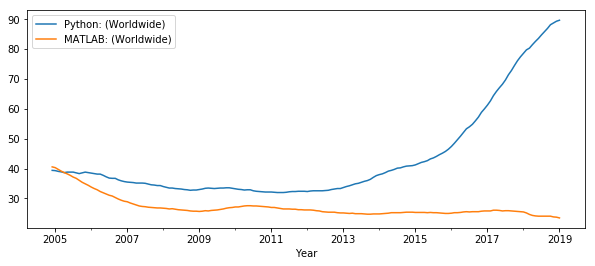

In [64]:
# We can also compute and plot the trend using the moving/rolling mean 
ts.rolling(12).mean().rename_axis('Year', axis='index').plot(figsize=(10,4));

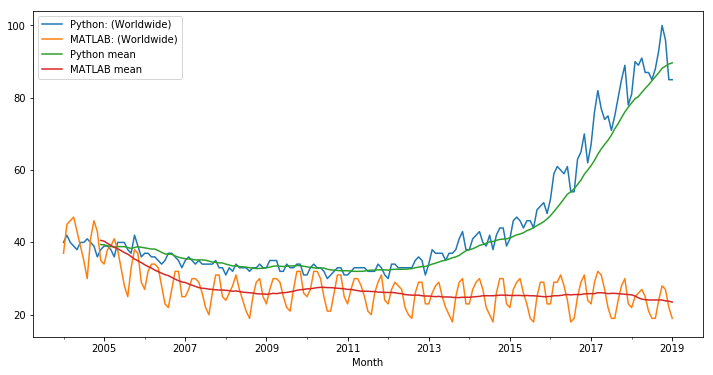

In [65]:
# We can also plot them together
ts2 = ts.copy()
ts2[["Python mean","MATLAB mean"]] = ts2[original_cols].rolling(12).mean()
ts2.plot(figsize=(12,6));

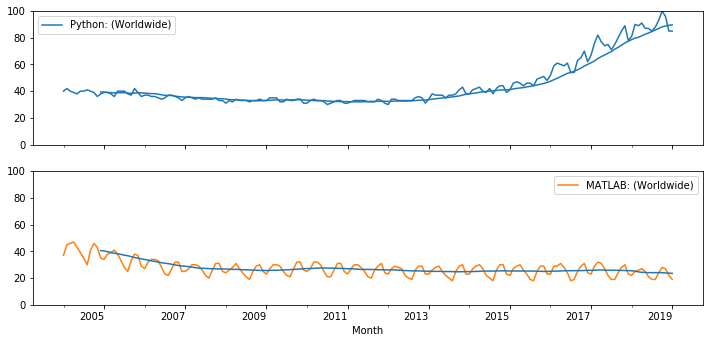

In [66]:
# We can also plot them is separate plots
a = ts.plot(figsize=(12,6), subplots=True); a[0].set_ylim(bottom=0, top=100); a[1].set_ylim(bottom=0, top=100);
ts2['Python mean'].plot(ax=a[0]); ts2['MATLAB mean'].plot(ax=a[1]);


# Going from Pandas to Scikit-learn via Numpy

In [67]:
# Convert to numpy arrays
X = ts[ts.columns[0]].values.reshape(-1,1)
y = ts[ts.columns[1]].values

print(X.shape)
print(y.shape)


(181, 1)
(181,)


In [68]:
X = iris[['sepal', 'petal']].values
y = iris['species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Beyond Scikit-Learn

- Deep learning
- Statistical analysis, time series

<br/>

- Keras (with Tensorflow)
- Statsmodels

# Keras

- A high level APi that wraps Tensorflow, Theano and CTNK
- Designed to be 
    - Easy to use
    - Be modular
    - Easy to extend
    - Works directly with Python
- Take a look for examples and more details: <a href="https://keras.io/">https://keras.io/</a>


# Statsmodels

- Scikit-learn focus on prediction
- Statsmodels focus on classical statistical analysis:
    - statistical models
    - statistical tests
    - statistical data exploration

- Examples and more details: <a href="https://www.statsmodels.org">https://www.statsmodels.org</a>

# Summary

- Scikit-Learn provides essential tools for machine learning. 
    - It is more than training classifiers!
    - It integrates within a larger Python scientific ecosystem
- Numpy is a basic building block
- Pandas is your friend!
- Keras for deep learning (advanced neural networks)
- Statsmodels for classical statistical analysis
- Use serach engines to find answers!
- Try it for yourself!

In [ ]:
questions?